In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('Country_data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
X = data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# elbow method to find k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

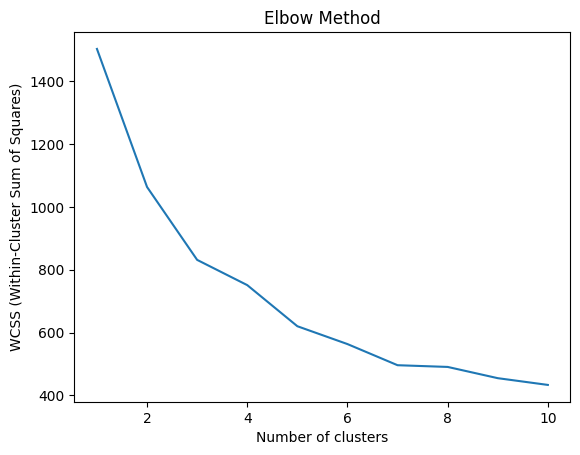

In [20]:
# optional
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [21]:
# Based on the elbow curve, choose the optimal number of clusters and perform K-means clustering
k = 3  # You can choose the number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [22]:
data['cluster'] = kmeans.labels_

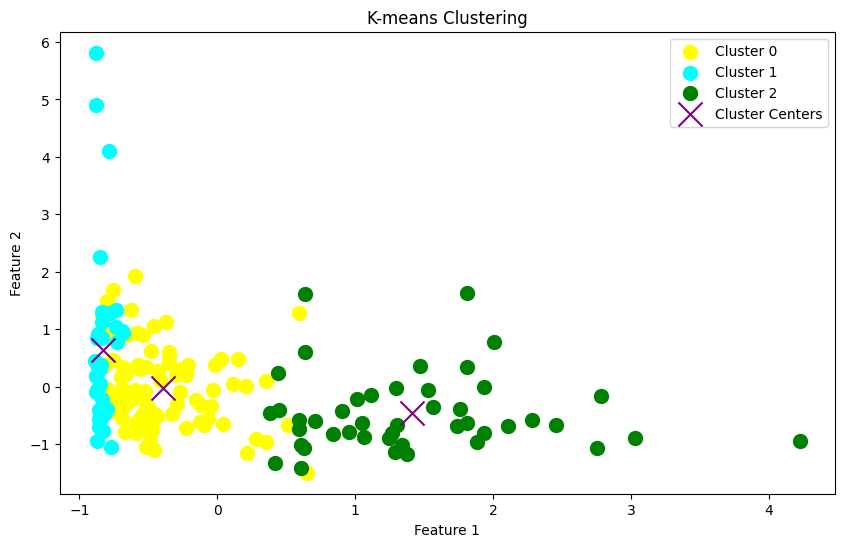

In [23]:
plt.figure(figsize=(10, 6))
# Scatter plot for cluster 0
plt.scatter(X[data['cluster'] == 0][:, 0], X[data['cluster'] == 0][:, 1], s=100, c='yellow', label='Cluster 0')
# Scatter plot for cluster 1
plt.scatter(X[data['cluster'] == 1][:, 0], X[data['cluster'] == 1][:, 1], s=100, c='cyan', label='Cluster 1')
# Scatter plot for cluster 2
plt.scatter(X[data['cluster'] == 2][:, 0], X[data['cluster'] == 2][:, 1], s=100, c='green', label='Cluster 2')
# Plotting the cluster centers with 'X' marker
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, c='purple', label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()